### Importación de las librerias necesarias:

In [16]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import seaborn as sns
import datetime

### Lectura de data

In [17]:
path=r"C:\\Users\\ashti\\Desktop\\pythonAnalytics\\data\\data.csv"
bd = pd.read_csv(path,delimiter=";")
df_main = pd.DataFrame(bd)

### Limpieza de datos:

In [18]:
# Búsqueda y eliminación de los datos nulos(NaN) en la columna ID

print(df_main['ID'].isna().sum())
df_main = df_main[df_main['ID'].notna()]

df_main

0


,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,1,HS,4.0,4.0,CA,0,1,A,14/01/2011,14/01/2011,...,K,Elementary,K->Elementary,H,1,0.063646,0.936508,4,L,1
1,2,HC,8.0,8.0,AZ,0,7,A,14/01/2011,21/01/2011,...,Middle,Middle,Middle->Middle,H,1,0.025882,0.880000,3,L,1
2,3,HD,8.0,8.0,FL,0,3,A,15/01/2011,17/01/2011,...,Middle,Middle,Middle->Middle,H,1,0.025131,0.888889,3,L,1
3,4,HN,9.0,12.0,VA,1,3,B,15/01/2011,17/01/2011,...,Undefined,Undefined,Undefined->Undefined,H,0,NaN,1.000000,0,NaN,0
4,5,HD,6.0,8.0,FL,0,6,T,16/01/2011,21/01/2011,...,Middle,Middle,Middle->Middle,H,0,0.112500,0.910112,8,M-L,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384,2385,HC,7.0,8.0,CA,0,5,A,28/06/2011,2/07/2011,...,Middle,Middle,Middle->Middle,H,0,0.018980,0.921053,3,L,0
2385,2386,HD,8.0,8.0,CA,0,5,A,29/06/2011,3/07/2011,...,K,Middle,K->Middle,H,1,0.034783,0.909091,2,S-M,1
2386,2387,HD,10.0,12.0,CA,0,6,A,29/06/2011,5/07/2011,...,Undefined,Undefined,Undefined->Undefined,H,0,NaN,0.882353,4,NaN,1
2387,2388,HS,4.0,4.0,CA,0,1,A,30/06/2011,30/06/2011,...,Undefined,Undefined,Undefined->Undefined,H,1,NaN,0.941176,1,NaN,1


In [19]:
# Eliminación de datos duplicados en la columna ID
filtro_duplicados = df_main['ID'].duplicated(keep=False)
df_main[filtro_duplicados]['ID'].value_counts().head()

Series([], Name: ID, dtype: int64)

### Preguntas de Exploración: 

In [20]:
matriz_correlacion_var=["Days","NumberOfMeetingswithParents","Tuition","FRP.Take.up.percent.","SPR.Group.Revenue","MDR.High.Grade"]

corr_matrix = df_main[matriz_correlacion_var].corr()
corr_matrix

,Days,NumberOfMeetingswithParents,Tuition,FRP.Take.up.percent.,SPR.Group.Revenue,MDR.High.Grade
Days,1.000000,0.127983,0.772086,0.069282,0.772086,0.242661
NumberOfMeetingswithParents,0.127983,1.000000,0.153833,0.142427,0.153833,-0.018006
Tuition,0.772086,0.153833,1.000000,0.175085,1.000000,0.178791
FRP.Take.up.percent.,0.069282,0.142427,0.175085,1.000000,0.175085,0.043401
SPR.Group.Revenue,0.772086,0.153833,1.000000,0.175085,1.000000,0.178791
MDR.High.Grade,0.242661,-0.018006,0.178791,0.043401,0.178791,1.000000


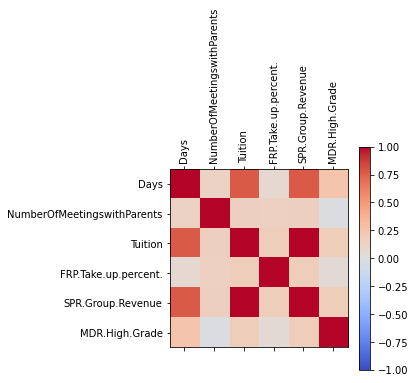

In [45]:
plt.matshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

plt.xticks(np.arange(corr_matrix.shape[0]), corr_matrix.columns, rotation=90)
plt.yticks(np.arange(corr_matrix.shape[0]), corr_matrix.columns)

plt.colorbar()
plt.savefig("Matriz de Correlación.png",bbox_inches="tight")

Analizando la matriz anterior, podemos corroborar ciertas relaciones entre las variables relevantes del presente estudio. A raiz de estas conjeturas se han logrado plantear las siguientes preguntas exploratorias:

In [22]:
# Preguntas de Exploración:
    # ¿Cuales son las regiones con mejor aceptación al servicio de STC?
    # ¿Cúal es la relación del código de pobreza de la escuela con la retención para el año 2012?
    # ¿Existe una relación entre el tipo de escuela y la retención para el año 2012?
    # ¿Qué meses del año presentan mayor número de viajes?


#### ¿Cúales son las regiones con mejor aceptación al servicio de STC?

In [23]:
df_main['Group.State'].describe()

count     2389
unique      54
top         CA
freq       718
Name: Group.State, dtype: object

In [24]:
path="C:\\Users\\ashti\\Desktop\\pythonAnalytics\\data\\shp\\Estados_Unidos_Estados.shp"
gdf_states = gpd.read_file(path)

<AxesSubplot:>

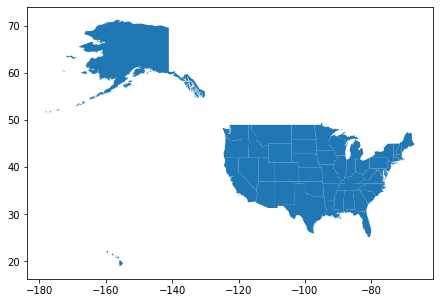

In [25]:
fig, (ax1) = plt.subplots(nrows=1, figsize=(10, 5))

gdf_states.plot(ax=ax1)

In [46]:
conteo_x_state = df_main['Group.State'].value_counts()
conteo_x_state = conteo_x_state.reset_index()
conteo_x_state.head()

,index,Group.State
0,CA,718
1,TX,308
2,WA,147
3,IL,104
4,CO,89
5,MI,71
6,FL,62
7,AZ,53
8,OH,53
9,MN,51


In [27]:
gdf_conteo_x_state = pd.merge(left=gdf_states, right=conteo_x_state,
                                left_on="STATE_ABBR",right_on="index")


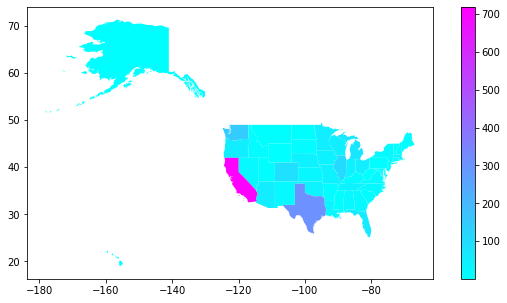

In [47]:
gdf_conteo_x_state.plot("Group.State", cmap='cool',
                       legend=True,figsize=(10, 5))

plt.savefig("Mapa de Calor.png",bbox_inches="tight")

#### ¿Cúal es la relación del código de pobreza de la escuela con la retención para el año 2012?

In [29]:
# Calculamos el porcentaje de ID retenidos y no retenidos
(df_main['Retained.in.2012.'].value_counts(normalize=True)*100).rename({0:"No Retenido (%):",1:"Retenido (%):"})

Retenido (%):       60.73671
No Retenido (%):    39.26329
Name: Retained.in.2012., dtype: float64

In [30]:
conteo_poberty_x_retained = (df_main[["Poverty.Code","Retained.in.2012."]]
                                .groupby(["Poverty.Code","Retained.in.2012."]).size()
                                .reset_index()
                                .rename({0:"conteo"},axis=1)
                            )
conteo_poberty_x_retained

,Poverty.Code,Retained.in.2012.,conteo
0,0,0,2
1,0,1,2
2,A,0,69
3,A,1,196
4,B,0,395
5,B,1,566
6,C,0,240
7,C,1,267
8,D,0,20
9,D,1,16


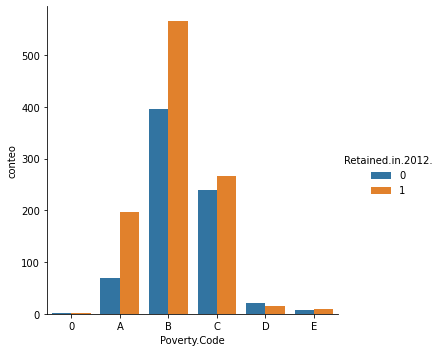

In [48]:
# Gráfica de barras comparativa para la retención de escuelas dependiendo de su indice de pobreza
g = sns.catplot(
    data=conteo_poberty_x_retained, kind="bar",
    x="Poverty.Code", y="conteo", hue="Retained.in.2012.",
)
g.set_xticklabels()
plt.savefig("Grafico de barras.png",bbox_inches="tight")

In [32]:
# A continuación comprobaremos, mediante chi cuadrado, la existencia de una dependencia entre ambas variables:

# En primer lugar calculamos una tabla de contingencia
contingency_table = pd.crosstab(df_main['Poverty.Code'], df_main['Retained.in.2012.'])
contingency_table

Retained.in.2012.,0,1
Poverty.Code,,
0,2,2
A,69,196
B,395,566
C,240,267
D,20,16
E,8,9


In [33]:
from scipy.stats import chi2_contingency

# Calculamos el valor de p
stat, p, dof, expected = chi2_contingency(contingency_table)
print(f'stat={stat:.3f}, p={p:.7f}')

stat=36.490, p=0.0000008


In [34]:
# Planteamos y verificamos nuestras variables: 

if p > 0.05:
	print('Se acepta la H0. Las dos muestras son independientes.')
else:
	print('Se rechaza la H0. Existe dependencia entre las muestras.')

Se rechaza la H0. Existe dependencia entre las muestras.


#### ¿Existe una relación entre el tipo de escuela y la retención para el año 2012?

In [35]:
# En primer lugar, elaboramos una tabla de contingencia a modo de resumen
contingency_table = pd.crosstab(df_main['School.Type'], df_main['Retained.in.2012.'])
contingency_table

Retained.in.2012.,0,1
School.Type,,
CHD,96,161
Catholic,57,106
PUBLIC,745,1073
Private non-Christian,40,111


In [36]:
# Mediante la información anterior podemos calcular el porcentaje de retorno segun el tipo de escuela:
CHD_percentage_retorn = (161*100)/(96+161)
Cath_percentage_retorn = (106*100)/(57+106)
PBL_percentage_retorn = (1073*100)/(745+1073)
PnC_percentage_retorn = (111*100)/(40+111)

print(f"El porcentaje de retorno en escuelas CHD es: {CHD_percentage_retorn} %")
print(f"El porcentaje de retorno en escuelas Católicas es: {Cath_percentage_retorn} %")
print(f"El porcentaje de retorno en escuelas Públicas es: {PBL_percentage_retorn} %")
print(f"El porcentaje de retorno en escuelas Privadas no Cristianas es: {PnC_percentage_retorn} %")


El porcentaje de retorno en escuelas CHD es: 62.64591439688716 %
El porcentaje de retorno en escuelas Católicas es: 65.03067484662577 %
El porcentaje de retorno en escuelas Públicas es: 59.02090209020902 %
El porcentaje de retorno en escuelas Privadas no Cristianas es: 73.50993377483444 %


In [37]:
# Elaboramos una tabla con información cruzada mas detallada

conteo_type_x_retained = (df_main[["School.Type","Retained.in.2012."]]
                                .groupby(["School.Type","Retained.in.2012."]).size()
                                .reset_index()
                                .rename({0:"conteo"},axis=1)
                            )
conteo_type_x_retained

,School.Type,Retained.in.2012.,conteo
0,CHD,0,96
1,CHD,1,161
2,Catholic,0,57
3,Catholic,1,106
4,PUBLIC,0,745
5,PUBLIC,1,1073
6,Private non-Christian,0,40
7,Private non-Christian,1,111


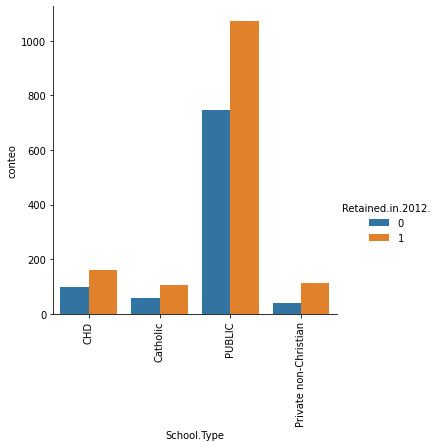

In [49]:
# Gráfica de barras comparativa - Tipo de escuela x Retención para el año 2012
g = sns.catplot(
    data=conteo_type_x_retained, kind="bar",
    x="School.Type", y="conteo", hue="Retained.in.2012.",
)
g.set_xticklabels(rotation=90)
plt.savefig("Grafico de barras 2.png",bbox_inches="tight")

In [39]:
# Finalmente, aplicamos el test de chi cuadrado para verificar la relación entre ambas variables:
from scipy.stats import chi2_contingency

# Calculamos el valor de p
stat, p, dof, expected = chi2_contingency(contingency_table)
print(f'stat={stat:.3f}, p={p:.7f}')

# Planteamos y verificamos nuestras variables: 

if p > 0.05:
	print('Se acepta la H0. Las dos muestras son independientes.')
else:
	print('Se rechaza la H0. Existe dependencia entre las muestras.')

stat=14.228, p=0.0026102
Se rechaza la H0. Existe dependencia entre las muestras.


#### ¿Qué meses del año presentan mayor número de viajes?

In [40]:
# Agregamos una columna al DataFrame (Departure.Date.Mod) en la que se detalla el mes cuando se realizó el viajed
df_main["Departure.Date.Mod"] = pd.to_datetime(df_main["Departure.Date"], format='%d/%m/%Y').dt.month

print("Fechas con más viajes registrados: ")
mas_viajes = df_main["Departure.Date"].value_counts().sort_values(ascending=False).head()
print(mas_viajes)


Fechas con más viajes registrados: 
7/06/2011     131
6/06/2011      72
14/06/2011     72
31/05/2011     70
1/06/2011      70
Name: Departure.Date, dtype: int64


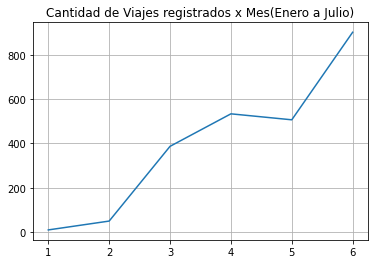

In [50]:
df_main["Departure.Date.Mod"].value_counts().sort_index().plot()

plt.grid(True)
plt.savefig("Grafico linea.png",bbox_inches="tight")